In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### exploratory analysis
we are here understanding the data

In [3]:
file =pd.read_csv("cardata.csv")

In [4]:
df=pd.DataFrame(file)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.shape

(400, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.duplicated().sum()

0

### One hot encoding
lets perform one hot encoding to convert the gender column from categorical to numerical

In [11]:
from sklearn.preprocessing import OneHotEncoder


In [12]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [13]:
df_encoded

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True
...,...,...,...,...,...,...
395,15691863,46,41000,1,True,False
396,15706071,51,23000,1,False,True
397,15654296,50,20000,1,True,False
398,15755018,36,33000,0,False,True


In [14]:
encoder = OneHotEncoder(sparse_output=False)


In [15]:
encoded_data = encoder.fit_transform(df[['Gender']])

In [16]:

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))

In [17]:
print(encoded_df)

     Gender_Female  Gender_Male
0              0.0          1.0
1              0.0          1.0
2              1.0          0.0
3              1.0          0.0
4              0.0          1.0
..             ...          ...
395            1.0          0.0
396            0.0          1.0
397            1.0          0.0
398            0.0          1.0
399            1.0          0.0

[400 rows x 2 columns]


In [18]:
result_df = pd.concat([df.drop(columns=['Gender']), encoded_df], axis=1)

In [19]:
print(result_df)

      User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0    15624510   19            19000          0            0.0          1.0
1    15810944   35            20000          0            0.0          1.0
2    15668575   26            43000          0            1.0          0.0
3    15603246   27            57000          0            1.0          0.0
4    15804002   19            76000          0            0.0          1.0
..        ...  ...              ...        ...            ...          ...
395  15691863   46            41000          1            1.0          0.0
396  15706071   51            23000          1            0.0          1.0
397  15654296   50            20000          1            1.0          0.0
398  15755018   36            33000          0            0.0          1.0
399  15594041   49            36000          1            1.0          0.0

[400 rows x 6 columns]


In [20]:
df =result_df

In [21]:
df.corr()['Purchased']

User ID            0.007120
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Gender_Female      0.042469
Gender_Male       -0.042469
Name: Purchased, dtype: float64

<Axes: xlabel='Purchased'>

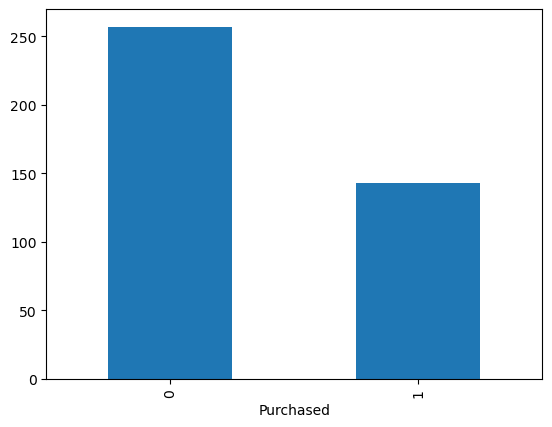

In [22]:
df['Purchased'].value_counts().plot(kind='bar')

In [23]:
df['Gender'] = np.where(df['Gender_Female'] == 1, 0, 1)

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

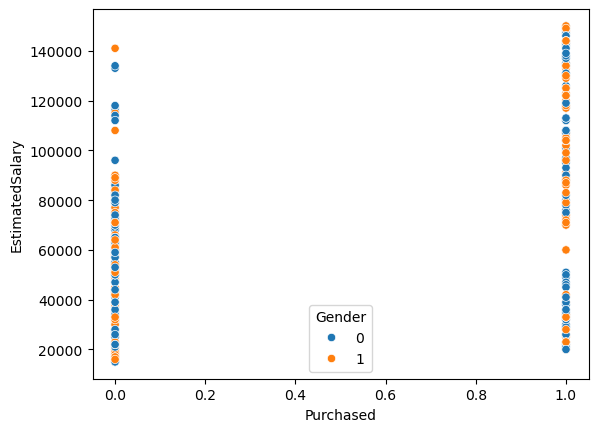

In [24]:
sns.scatterplot(x='Purchased', y='EstimatedSalary', data=df,hue=df['Gender'])

In [25]:
df=df.drop(columns=['Gender_Female','Gender_Male'])

In [26]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25 and feature not in ['User ID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 2


['Purchased', 'Gender']

In [27]:
continuous_feature=[feature for feature in df.columns if feature not in discrete_feature+['User ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))
#all other features - discrete feature -year_feature -id =continuous feature

Continuous feature Count 2


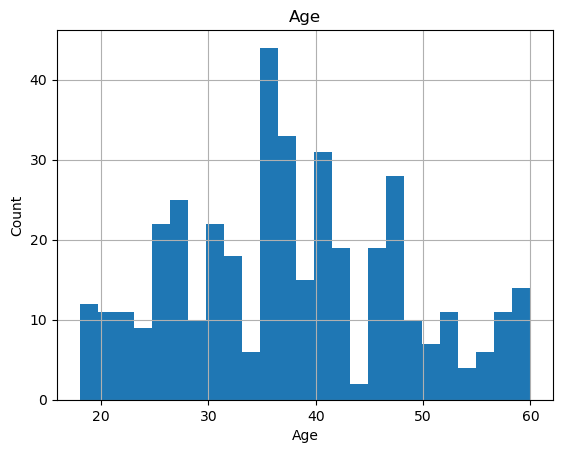

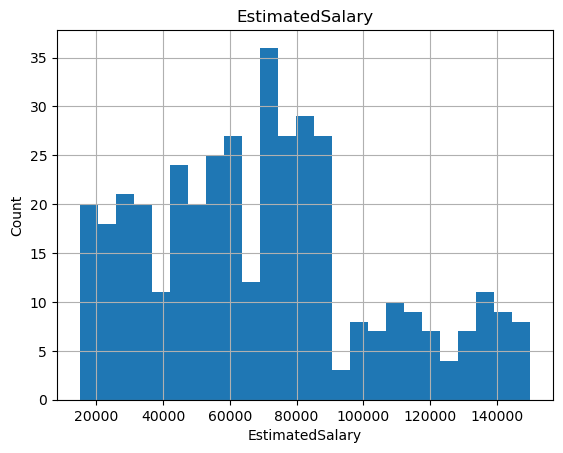

In [28]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
# here we have used histogram as continuous feature ka distribution study karna is easier A histogram is a type of bar chart that shows the
    #frequency of data points in a range of values, called a bin or class.

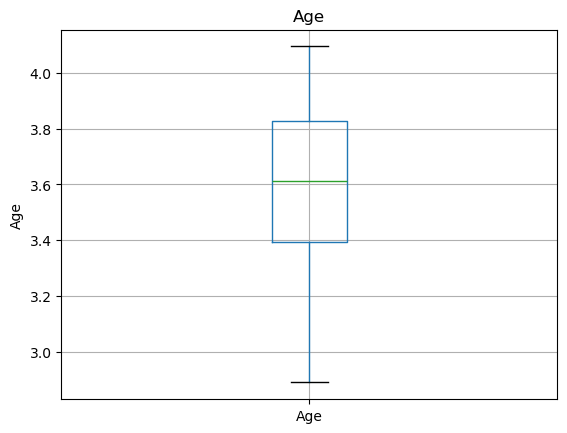

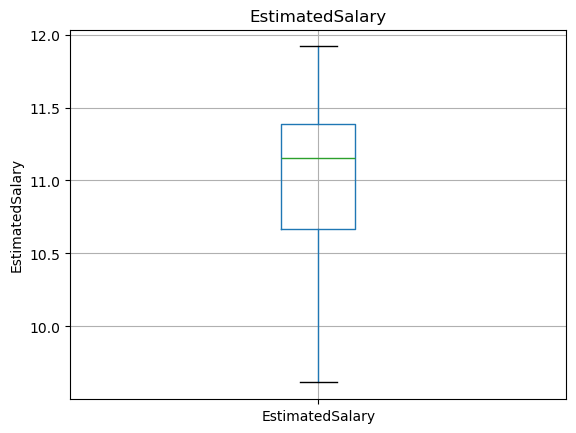

In [29]:
# outliers- extreme cases 
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
# this works for only continuous features not discreete features

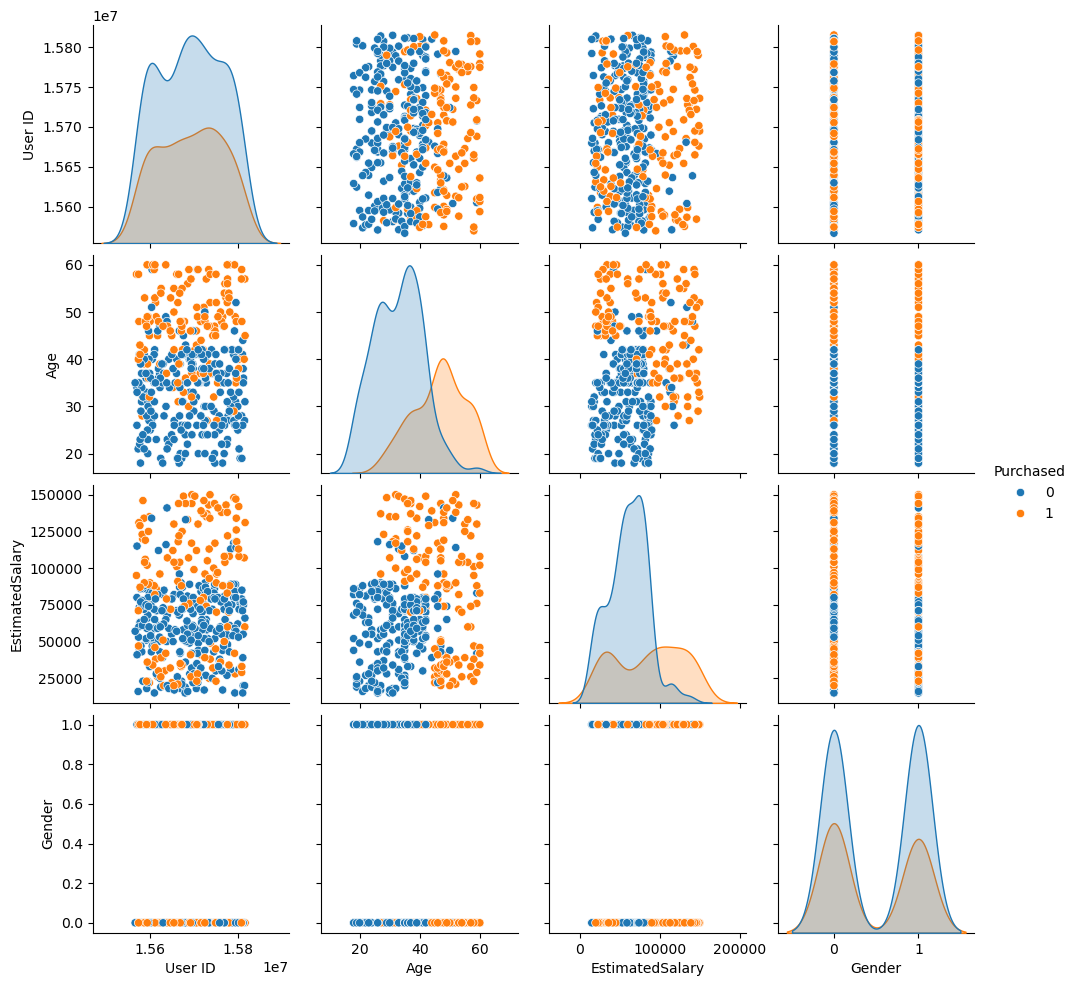

In [30]:
sns.pairplot(df, hue='Purchased')


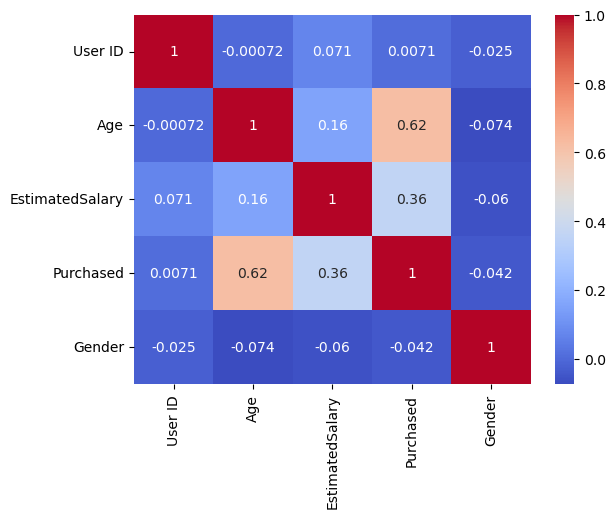

In [31]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### Feature Scaling

In [33]:
scaling_feature=[feature for feature in df.columns if feature not in ['User ID','Purchased'] ]
len(scaling_feature)

3

In [34]:


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scaling_feature])

MinMaxScaler()

In [35]:
scaler.transform(df[scaling_feature])

array([[0.02380952, 0.02962963, 1.        ],
       [0.4047619 , 0.03703704, 1.        ],
       [0.19047619, 0.20740741, 0.        ],
       ...,
       [0.76190476, 0.03703704, 0.        ],
       [0.42857143, 0.13333333, 1.        ],
       [0.73809524, 0.15555556, 0.        ]])

In [36]:
# transform the train and test set, and add on the Id and SalePrice variables
df = pd.concat([df[['Purchased']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [37]:
df.head()

,Purchased,Age,EstimatedSalary,Gender
0,0,0.023810,0.029630,1.0
1,0,0.404762,0.037037,1.0
2,0,0.190476,0.207407,0.0
3,0,0.214286,0.311111,0.0
4,0,0.023810,0.451852,1.0


### Logistic Regression
as the data is category based we need to perfrom logistic regression

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [43]:
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [45]:
y_proba = model.predict_proba(x_test)[:, 1]


In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)


Accuracy: 0.89


In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[67  1]
 [10 22]]


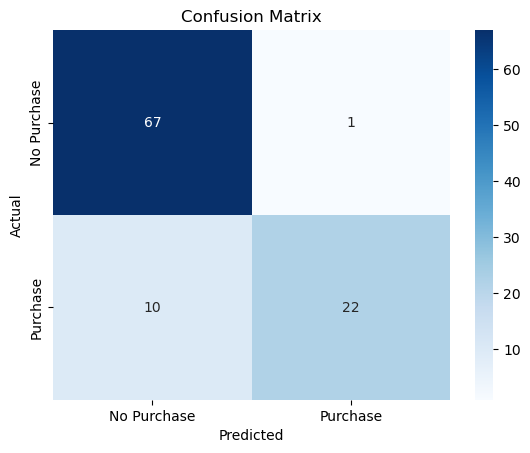

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [49]:
import pickle
import sklearn

In [50]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)



numpy 1.26.4
pandas 2.2.2
sklearn 1.4.2


In [51]:
filename = 'logistic_regression_model.pkl'  # Specify the file name
with open(filename, 'wb') as file:  # Open the file in binary write mode
    pickle.dump(model, file)

In [52]:
print(f"Model saved to {filename}")

# Step 3: Load the model back
with open(filename, 'rb') as file:  # Open the file in binary read mode
    loaded_model = pickle.load(file)

# Verify the loaded model
print("Loaded model test accuracy:", loaded_model.score(x_test, y_test))

Model saved to logistic_regression_model.pkl
Loaded model test accuracy: 0.89


In [53]:
x_test.head()

,Age,EstimatedSalary,Gender
132,0.285714,0.533333,1.0
309,0.476190,0.259259,0.0
341,0.404762,0.444444,1.0
196,0.285714,0.474074,0.0
246,0.404762,0.259259,0.0


In [54]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [55]:
df

,Purchased,Age,EstimatedSalary,Gender
0,0,0.023810,0.029630,1.0
1,0,0.404762,0.037037,1.0
2,0,0.190476,0.207407,0.0
3,0,0.214286,0.311111,0.0
4,0,0.023810,0.451852,1.0
...,...,...,...,...
395,1,0.666667,0.192593,0.0
396,1,0.785714,0.059259,1.0
397,1,0.761905,0.037037,0.0
398,0,0.428571,0.133333,1.0


In [56]:
data = {
    "Age": [5, 35],
    "EstimatedSalary": [3000, 80000],
    "Gender": [1, 0]
}

In [57]:
test=pd.DataFrame(data)

In [58]:
p_test=model.predict(test)
p_test

array([1, 1], dtype=int64)

In [114]:

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [118]:
scaler.fit_transform(test)

array([[0., 0., 1.],
       [1., 1., 0.]])

In [120]:
test

,Age,EstimatedSalary,Gender
0,5,3000,1
1,35,80000,0


In [122]:
test=scaler.fit_transform(test)

In [124]:
test

array([[0., 0., 1.],
       [1., 1., 0.]])

In [126]:
p_test=model.predict(test)
p_test

C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)